## Machine Learning Exercise 2: Classification Basics ##

In this exercise, you'll be working with a dataset containing information about passengers on the Titanic. You can get more information about this dataset [here](https://www.kaggle.com/competitions/titanic). Our goal will be to build a model to predict whether a passenger survived the voyage.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

Let's start by building a model using Age as a predictor variable.

When performing a train/test split, you usually want to make sure that the ratios of target values look the same in the training set and in the test set. This is especially true with imbalanced targets, where there are more observations in one class than the other. This can be done by, instead of a completely random split, by performing a **stratified** split.


In [5]:
data = pd.read_csv('../data/titanic.csv')

data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1.  Create a DataFrame, X, which contains one column, Age, and a Series, y, which contains the target variable. Perform a 70/30 train/test split, stratifying by the target variable. Make sure that you set a random_state during this split.

In [173]:
X = data[['Age']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321, stratify=y)

2. Now, try and fit a logistic regression model using the [LogisticRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). When you do this, you're likely to encounter an error, that "Input X contains NaN." If you check, you'll find that there are some missing values in the Age column. In the next step, we'll address this issue.

In [175]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


One option when a column contains missing values is to **impute** them, meaning to replace the missing values with an estimate. A simple way to impute is to fill missing values using the mean value. **Important Note:** When imputing with the mean, you should calculate the mean value only on the training data. In order to have an unbiased estimate of model performance, it is important that the model has access to no information about the test set.

3. Using a [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html), fit the training data and then use it to transform both the training and test data. 

In [179]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=X_train)
X_impute_train = imputer.fit_transform(X_train)
X_impute_test = imputer.transform(X_test)

In [181]:
logreg.fit(X_impute_train, y_train)

LogisticRegression()

4. Now, fit your logistic regression model to the training data and generate predictions on the test data.

In [183]:
y_pred = logreg.predict(X_impute_test)

print(type(y_pred), y_pred.shape, type(y_test), y_test.shape)

<class 'numpy.ndarray'> (268,) <class 'pandas.core.series.Series'> (268,)


In [185]:
y_pred.sum()

0

In [193]:
accuracy = logreg.score(X_impute_test, y_test)

accuracy

0.6156716417910447

There are multiple ways we can assess the performance of a classification model. A common way is put those predictions into a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), which compares the predicted and actual values. 

5. Create a confusion matrix out of the predictions. What do you find?

In [189]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

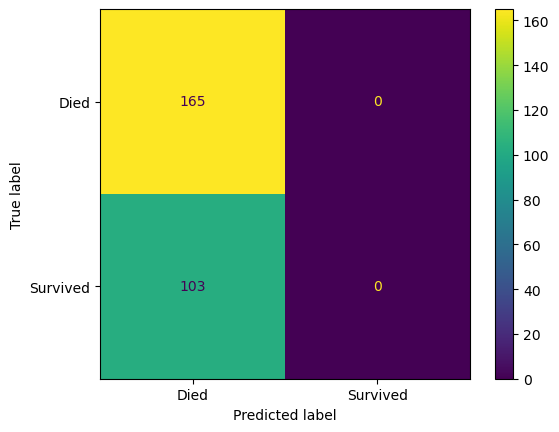

In [191]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
disp.plot()
plt.show()

In [195]:
class_report = classification_report(y_test, y_pred, target_names=['Died', 'Survived'], output_dict=True)

class_report = pd.DataFrame(class_report).transpose()

class_report

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,precision,recall,f1-score,support
Died,0.615672,1.000000,0.762125,165.000000
Survived,0.000000,0.000000,0.000000,103.000000
accuracy,0.615672,0.615672,0.615672,0.615672
macro avg,0.307836,0.500000,0.381062,268.000000
weighted avg,0.379052,0.615672,0.469219,268.000000


6. Plot the ROC curve. How well does your model do? Hint: You can use the [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) to create this plot.

In [197]:
from sklearn.metrics import RocCurveDisplay

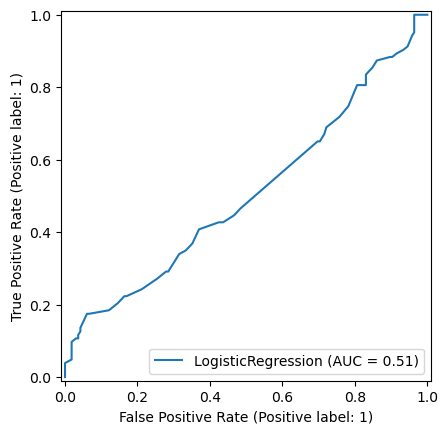

In [199]:
ROC_curve = RocCurveDisplay.from_estimator(logreg, X_impute_test, y_test)

You are likely to see that the model does not tend to predict that individuals survived the voyage. Let's see if we can determine why.

7. Look at the average age of survivors vs. those that did not survive the voyage. What do you find?

In [201]:
data_survived = data[data.Survived == 1]['Age'].mean()

data_dead = data[data.Survived == 0]['Age'].mean()

print(data_survived, data_dead)

28.343689655172415 30.62617924528302


8. Perhaps the actual age number is as important as whether a passenger was a child or an adult. Create a Boolean column that indicates whether a passenger was a child or an adult. Pick a cutoff age and if they were less than this age, label as a child. We'll see later on how we can make choosing the age part of our model building pipeline, but for now, choose an age or do some calculations to pick an age that you think might do well.

In [203]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [205]:
data['Child'] = data['Age'].apply(lambda x: 1 if x < 18 else 0)

In [207]:
data['Child'].value_counts()

Child
0    778
1    113
Name: count, dtype: int64

9. When imputing the missing values, you'll need to change the strategy from mean to most_frequent. Impute the missing values, then fit the model using this new variable, generate predictions, and view the confusion matrix. How did your model do?

In [209]:
X = data[['Child']]
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321, stratify=y)

In [217]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=X_train)
X_impute_train = imputer.fit_transform(X_train)
X_impute_test = imputer.transform(X_test)

In [219]:
logreg = LogisticRegression()

logreg.fit(X_impute_train, y_train)

y_pred = logreg.predict(X_impute_test)

In [221]:
y_test.value_counts()

Survived
0    165
1    103
Name: count, dtype: int64

In [223]:
X_test.value_counts()

Child
0        239
1         29
Name: count, dtype: int64

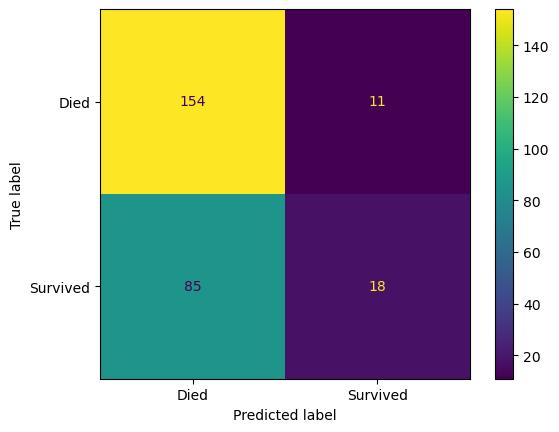

In [225]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
disp.plot()
plt.show()

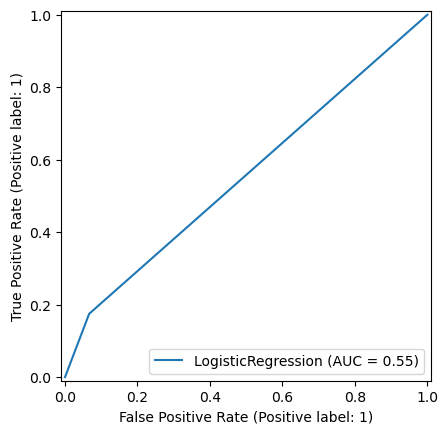

In [227]:
ROC_curve = RocCurveDisplay.from_estimator(logreg, X_impute_test, y_test)

In [229]:
Accuracy = logreg.score(X_impute_test, y_test)

Accuracy

0.6417910447761194

Other common metrics for classification include accuracy, precision, and recall. For more information, see https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall. These metrics can be viewed using the [classification_report function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). 

In [231]:
from sklearn.metrics import classification_report

10. Generate a classification report for your model.

In [233]:
class_report = classification_report(y_test, y_pred, target_names=['Died', 'Survived'], output_dict=True)

class_report = pd.DataFrame(class_report).transpose()

class_report

,precision,recall,f1-score,support
Died,0.644351,0.933333,0.762376,165.000000
Survived,0.620690,0.174757,0.272727,103.000000
accuracy,0.641791,0.641791,0.641791,0.641791
macro avg,0.632521,0.554045,0.517552,268.000000
weighted avg,0.635258,0.641791,0.574190,268.000000


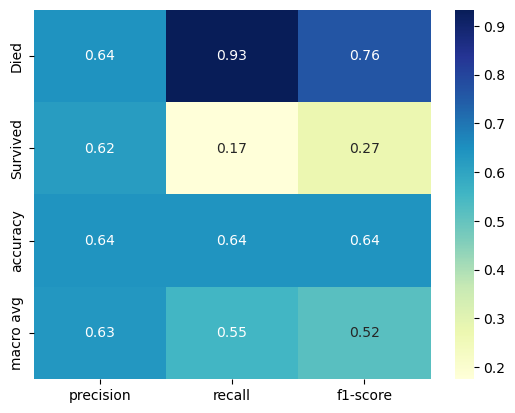

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(class_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.show()

Another important variable is the Sex variable. 

11. Create a DataFrame, X, which contains one column, Sex, and a Series, y, which contains the target variable. Perform a 70/30 train/test split, stratifying by the target variable. Make sure that you set a random_state during this split



If you inspect the Sex variable, you'll find that it is encoded as a string. We need to convert it to a numeric type so that our model can use it. We can do this using a [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

12. Fit a OneHotEncoder to the training data and then transform both the training and test sets. Fit a model and evaluate the performance of this model.


Notice how we have used different types of transformations, an imputer for the age-related variables and a OneHotEncoder for the Sex variable. When we need to use multiple types of transformations, a [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) is useful. 

In the next part, we'll fit a model using both the Sex column and our column indicating whether the passenger was a child.

13. Create a DataFrame, X, which contains two columns, Sex and the child indicator column, and a Series, y, which contains the target variable. Perform a 70/30 train/test split, stratifying by the target variable. Make sure that you set a random_state during this split. Then create a ColumnTransformer which will apply a SimpleImputer to the child column and a OneHotEncoder to the Sex column. Fit it on the training data and then transform the test data. Then fit a model on this and see how well it does.

Finally, let's see how we can do all of this in a slightly more compact manner. We can use a [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) which allows us to specify preprocessing steps (like the ColumnTransformer we used earlier) as well as the model we want to fit.

14. Create a Pipeline which contains the ColumnTransformer and the LogisticRegression model. 

## If you've reached this point, let your instructors know so that they can check in with you. ##

Stretch Goals

1. Try adding additional features and see how this affects your model. Think carefully about if you want passenger class to be treated as a numeric or a categorical variable.